# Black Friday Dataset EDA and Feature Engineering
Cleaning and preparing the data for model Training

#Problem Statement

A retail company " ABC Private limited" wants to understand the customer purchase behaviour (specifically,purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The dataset also contains customer demographics (age, gender,marital status,city_type,stay_in_current_city),product details (product_id and product_category ) and Total purchase amount from last month

Now, they want to build a model to predict the purchase amount of customer against various products which will hep them to create personalized offer for customers against different products.

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [113]:
df_train=pd.read_csv('/content/train.csv')
df_train.shape

(550068, 12)

In [114]:
df_test = pd.read_csv('/content/test.csv')
df_test.shape

(178630, 11)

In [115]:
#merge both train and test datasets
df=df_train.append(df_test)
df.shape

<ipython-input-115-658c93b7dcd4>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_train.append(df_test)


(728698, 12)

In [116]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                float64
Product_Category_1            float64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728698 entries, 0 to 178629
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     728698 non-null  int64  
 1   Product_ID                  728698 non-null  object 
 2   Gender                      728698 non-null  object 
 3   Age                         728698 non-null  object 
 4   Occupation                  728698 non-null  int64  
 5   City_Category               728698 non-null  object 
 6   Stay_In_Current_City_Years  728697 non-null  object 
 7   Marital_Status              728697 non-null  float64
 8   Product_Category_1          728697 non-null  float64
 9   Product_Category_2          499798 non-null  float64
 10  Product_Category_3          221185 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 72.3+ MB


In [118]:
df.shape

(728698, 12)

In [119]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.286980e+05,728698.000000,728697.00000,728697.000000,499798.000000,221185.000000,550068.000000
mean,1.003027e+06,8.079601,0.40987,5.373473,9.844037,12.668282,9263.968713
std,1.726102e+03,6.520967,0.49181,3.889361,5.089473,4.124753,5023.065394
min,1.000001e+06,0.000000,0.00000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.00000,1.000000,5.000000,9.000000,5823.000000
50%,1.003074e+06,7.000000,0.00000,5.000000,9.000000,14.000000,8047.000000
75%,1.004473e+06,14.000000,1.00000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.00000,20.000000,18.000000,18.000000,23961.000000


In [120]:
df.drop(['User_ID'],axis=1,inplace=True)

In [121]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0.0,8.0,NaN,NaN,7969.0


In [122]:
#handling categorical feature Gender
df['Gender'] = df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0.0,8.0,NaN,NaN,7969.0


In [123]:
# handling categorical feature Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [124]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0.0,8.0,NaN,NaN,7969.0


In [125]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [126]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0.0,3.0,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0.0,12.0,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0.0,12.0,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0.0,8.0,NaN,NaN,7969.0,0,1


In [127]:
#drop city categorical feature
df.drop('City_Category',axis=1,inplace=True)

In [128]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0.0,3.0,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0.0,12.0,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0.0,12.0,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0.0,8.0,NaN,NaN,7969.0,0,1


In [129]:
#Missing values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         1
Marital_Status                     1
Product_Category_1                 1
Product_Category_2            228900
Product_Category_3            507513
Purchase                      178630
B                                  0
C                                  0
dtype: int64

In [130]:
df.shape

(728698, 12)

In [131]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [132]:
df['Product_Category_2'].value_counts()

8.0     84878
14.0    73321
2.0     65538
16.0    57349
15.0    50277
5.0     34618
4.0     34119
6.0     21896
11.0    18779
17.0    17749
13.0    13968
9.0      7556
12.0     7297
10.0     4079
3.0      3831
18.0     3747
7.0       796
Name: Product_Category_2, dtype: int64

In [133]:
# here the categorical  contains discrete values need to replace the values with mode in missing values
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [134]:
df['Product_Category_2'].isnull().sum()

0

In [135]:
#Product catetory feature
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [136]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0.0,3.0,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0.0,12.0,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0.0,12.0,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0.0,8.0,8.0,16.0,7969.0,0,1


In [137]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

<ipython-input-137-7d6a3c4db74c>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [138]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0.0,3.0,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0.0,12.0,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0.0,12.0,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0.0,8.0,8.0,16.0,7969.0,0,1


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728698 entries, 0 to 178629
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  728698 non-null  object 
 1   Gender                      728698 non-null  int64  
 2   Age                         728698 non-null  int64  
 3   Occupation                  728698 non-null  int64  
 4   Stay_In_Current_City_Years  728697 non-null  object 
 5   Marital_Status              728697 non-null  float64
 6   Product_Category_1          728697 non-null  float64
 7   Product_Category_2          728698 non-null  float64
 8   Product_Category_3          728698 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           728698 non-null  uint8  
 11  C                           728698 non-null  uint8  
dtypes: float64(5), int64(3), object(2), uint8(2)
memory usage: 62.5+ MB


In [140]:
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0.0,3.0,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0.0,12.0,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0.0,12.0,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0.0,8.0,8.0,16.0,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
178625,P00331942,0,3,1,3,0.0,5.0,8.0,16.0,NaN,1,0
178626,P00293142,1,2,11,0,0.0,5.0,8.0,16.0,NaN,1,0
178627,P00208042,1,4,7,4,0.0,8.0,8.0,16.0,NaN,0,1
178628,P00258742,1,2,18,4,0.0,5.0,8.0,16.0,NaN,0,1


In [141]:
df['Stay_In_Current_City_Years'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
178625    False
178626    False
178627    False
178628    False
178629     True
Name: Stay_In_Current_City_Years, Length: 728698, dtype: bool

In [160]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].isna().dropna()
df['Stay_In_Current_City_Years']

0         False
1         False
2         False
3         False
4         False
          ...  
178625    False
178626    False
178627    False
178628    False
178629    False
Name: Stay_In_Current_City_Years, Length: 728698, dtype: bool

In [162]:
df['Stay_In_Current_City_Years'].isnull().value_counts()

False    728698
Name: Stay_In_Current_City_Years, dtype: int64

In [163]:
# convert object into Integers
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,0,0.0,3.0,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,0,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,0,0.0,12.0,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,0,0.0,12.0,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,0,0.0,8.0,8.0,16.0,7969.0,0,1


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728698 entries, 0 to 178629
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  728698 non-null  object 
 1   Gender                      728698 non-null  int64  
 2   Age                         728698 non-null  int64  
 3   Occupation                  728698 non-null  int64  
 4   Stay_In_Current_City_Years  728698 non-null  int64  
 5   Marital_Status              728697 non-null  float64
 6   Product_Category_1          728697 non-null  float64
 7   Product_Category_2          728698 non-null  float64
 8   Product_Category_3          728698 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           728698 non-null  int64  
 11  C                           728698 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 72.3+ MB


In [165]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728698 entries, 0 to 178629
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  728698 non-null  object 
 1   Gender                      728698 non-null  int64  
 2   Age                         728698 non-null  int64  
 3   Occupation                  728698 non-null  int64  
 4   Stay_In_Current_City_Years  728698 non-null  int64  
 5   Marital_Status              728697 non-null  float64
 6   Product_Category_1          728697 non-null  float64
 7   Product_Category_2          728698 non-null  float64
 8   Product_Category_3          728698 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           728698 non-null  int64  
 11  C                           728698 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 72.3+ MB


<Axes: xlabel='Age', ylabel='Purchase'>

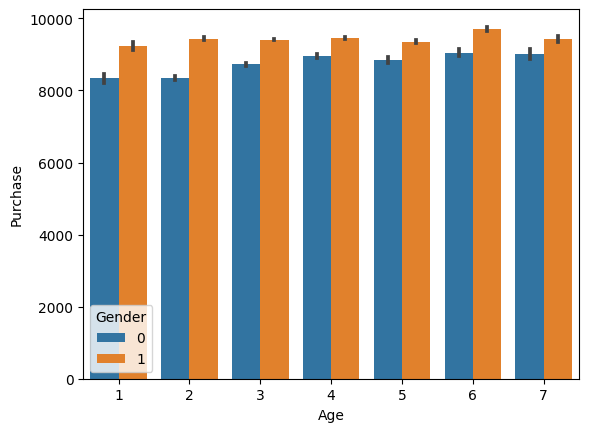

In [166]:
# visualization
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)

from the above observation we can say that,purchasing of men is high then women



<Axes: xlabel='Occupation', ylabel='Purchase'>

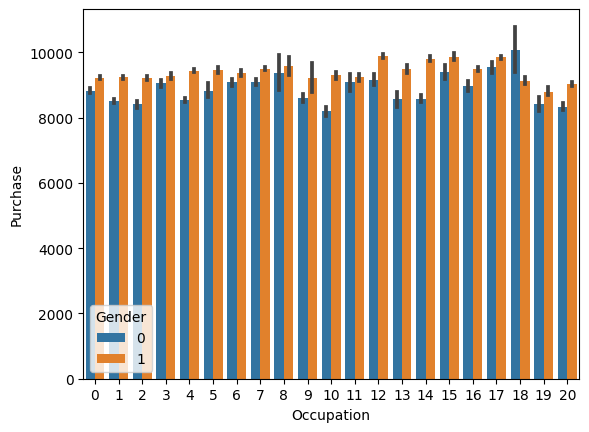

In [147]:
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

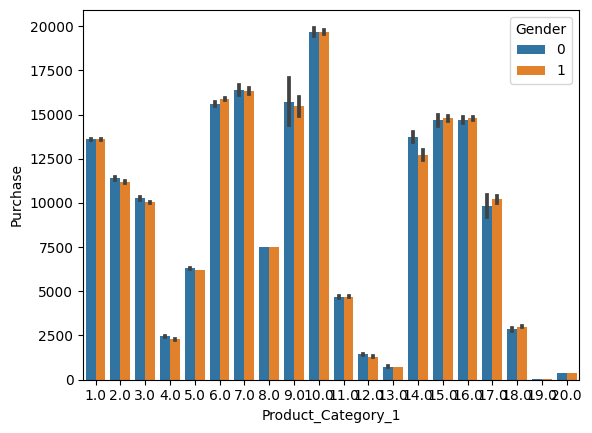

In [148]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

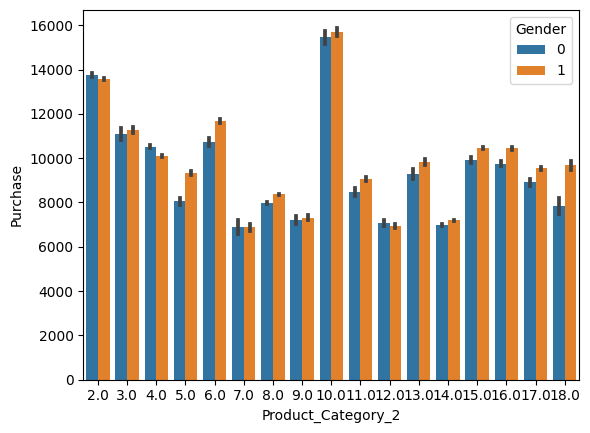

In [149]:
 sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)

In [150]:
#Feature scaling
df_test=df[df['Purchase'].isnull()]

In [151]:
df_train = df[~df['Purchase'].isnull()]

In [152]:
X=df_train.drop('Purchase',axis=1)

In [153]:
X.head()
X.shape


(550068, 11)

In [154]:
y=df_train['Purchase']
y.shape

(550068,)

In [155]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [156]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [157]:
X_train

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
396876,1,2,14,0,0.0,1.0,2.0,16.0,1,0
433826,1,6,0,0,1.0,8.0,16.0,16.0,0,0
516298,1,4,17,0,0.0,3.0,4.0,12.0,0,1
193380,1,3,4,0,0.0,8.0,16.0,16.0,1,0
273542,0,4,20,0,1.0,3.0,4.0,12.0,1,0
...,...,...,...,...,...,...,...,...,...,...
110268,1,5,17,0,0.0,5.0,8.0,16.0,0,1
259178,1,3,14,0,1.0,5.0,8.0,16.0,0,1
365838,0,2,1,0,0.0,5.0,8.0,16.0,1,0
131932,0,2,4,0,0.0,8.0,14.0,16.0,1,0


In [158]:
# feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)